In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Open csv with labeling information
df = pd.read_csv('annotations.csv')
df.head()

,Image Name,Position,Label,Top-Left X,Top-Left Y,Bottom-Right X,Bottom-Right Y
0,img_1518.png,1,5,1000,592,1018,654
1,img_1518.png,2,5,972,580,984,636
2,img_1518.png,3,8,940,562,954,628
3,img_1518.png,4,6,912,554,920,616
4,img_1518.png,5,2,880,540,890,604


## Label analysis

In [3]:
df["Label"].nunique()

13

There are 13 different labels. Here are the possible labels: 

In [4]:
df["Label"].unique()

array(['5', '8', '6', '2', '1', '0', '9', '4', '3', '7', 'C', 'X', 'E'],
      dtype=object)

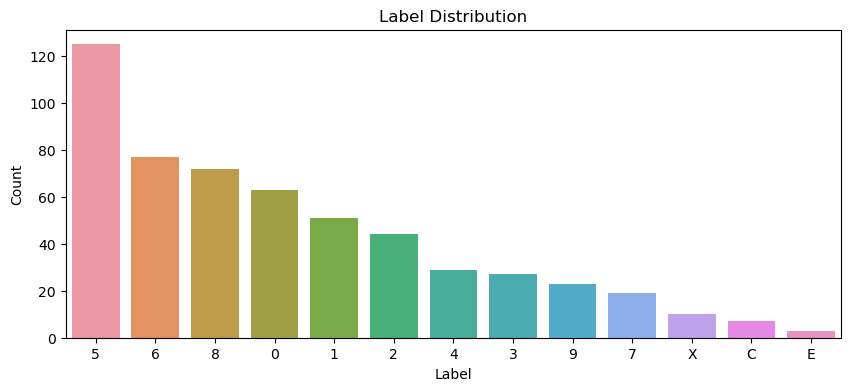

In [5]:
distribution_label = df['Label'].value_counts()

plt.figure(figsize=(10, 4))
sns.barplot(x = distribution_label .index, y = distribution_label .values)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

We can see that the most popular character is the number 5. We can also see that some characters are letter ('X', 'C', 'E') but they are far less present that numbers

## Position analysis

Here is an overview of the position of each possible character: 

In [6]:
avg_positions = df.groupby('Label')[['Top-Left X', 'Top-Left Y', 'Bottom-Right X', 'Bottom-Right Y']].mean().reset_index()
print("Average position of each label:")
avg_positions

Average position of each label:


,Label,Top-Left X,Top-Left Y,Bottom-Right X,Bottom-Right Y
0,0,796.444444,605.396825,811.365079,644.476190
1,1,792.117647,588.196078,803.960784,627.568627
2,2,802.863636,583.590909,825.318182,624.181818
3,3,801.111111,594.148148,805.481481,637.259259
4,4,802.620690,595.034483,827.241379,628.275862
5,5,811.104000,589.024000,826.032000,628.200000
6,6,806.987013,585.298701,824.688312,626.753247
7,7,802.000000,568.000000,835.894737,603.263158
8,8,821.027778,616.666667,830.888889,655.944444
9,9,794.608696,609.913043,810.086957,654.782609


In [7]:
position_stats = df.groupby('Label').agg({
    'Top-Left X': ['mean', 'min', 'max'],
    'Top-Left Y': ['mean', 'min', 'max'],
    'Bottom-Right X': ['mean', 'min', 'max'],
    'Bottom-Right Y': ['mean', 'min', 'max']
}).reset_index()

print("Position statistics for each label:")
position_stats

Position statistics for each label:


Label  Top-Left X             Top-Left Y           Bottom-Right X       \
                mean  min   max        mean  min  max           mean  min   
0      0  796.444444  588   982  605.396825  434  782     811.365079  638   
1      1  792.117647  608   944  588.196078  402  770     803.960784  660   
2      2  802.863636  618  1012  583.590909  450  754     825.318182  652   
3      3  801.111111  626  1000  594.148148  418  790     805.481481  650   
4      4  802.620690  596   968  595.034483  392  740     827.241379  654   
5      5  811.104000  604  1038  589.024000  412  828     826.032000  602   
6      6  806.987013  644   996  585.298701  380  786     824.688312  666   
7      7  802.000000  592  1014  568.000000  392  806     835.894737  654   
8      8  821.027778  632   980  616.666667  406  840     830.888889  650   
9      9  794.608696  596  1012  609.913043  404  794     810.086957  636   
10     C  744.857143  586  1032  576.285714  436  756     777.142857  610   
11     E  867.333333  702   952  511.333333  390  686     863.333333  708   
12     X  797.800000  606  1016  633.800000  416  780     815.200000  642   

         Bottom-Right Y            
     max           mean  min  max  
0   1032     644.476190  484  818  
1    964     627.568627  458  822  
2   1060     624.181818  492  810  
3   1044     637.259259  476  842  
4   1028     628.275862  432  790  
5   1044     628.200000  414  828  
6   1052     626.753247  442  842  
7   1064     603.263158  434  846  
8   1030     655.944444  446  884  
9   1060     654.782609  462  850  
10  1082     617.714286  498  742  
11   984     558.666667  424  736  
12  1072     685.000000  488  838

In [8]:
df['Width'] = df['Bottom-Right X'] - df['Top-Left X']
df['Height'] = df['Bottom-Right Y'] - df['Top-Left Y']

size_stats = df.groupby('Label').agg({
    'Width': ['mean', 'std'],
    'Height': ['mean', 'std']
}).reset_index()

print("Bounding box size statistics for each label:")
size_stats

Bounding box size statistics for each label:


Label      Width                Height           
               mean        std       mean        std
0      0  14.920635  36.434343  39.079365  18.612605
1      1  11.843137  34.749027  39.372549  17.975495
2      2  22.454545  33.242908  40.590909  19.923479
3      3   4.370370  39.050409  43.111111  13.981673
4      4  24.620690  36.645419  33.241379  25.187377
5      5  14.928000  35.461514  39.176000  18.803768
6      6  17.701299  33.687834  41.454545  18.048579
7      7  33.894737  31.541674  35.263158  18.537776
8      8   9.861111  37.918112  39.277778  18.217174
9      9  15.478261  33.597713  44.869565  17.754140
10     C  32.285714  26.087764  41.428571  27.512768
11     E  -4.000000  41.904654  47.333333  12.220202
12     X  17.400000  26.466751  51.200000  17.743857

/Users/jeanneallocio/anaconda3/envs/ada/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jeanneallocio/anaconda3/envs/ada/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


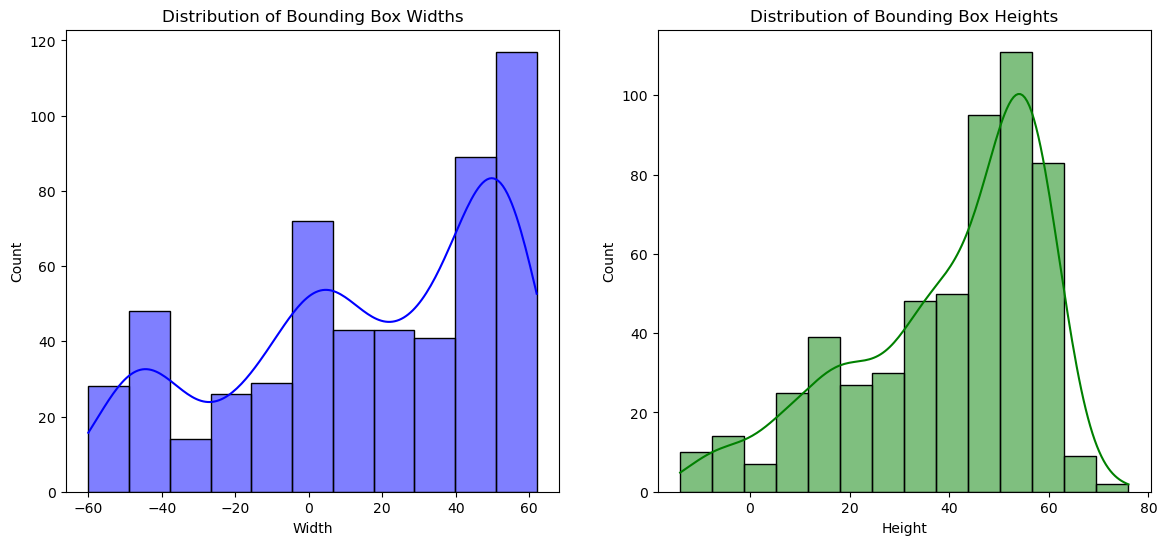

In [9]:
# Plot distribution of widths and heights
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Width'], kde=True, color='blue')
plt.title("Distribution of Bounding Box Widths")

plt.subplot(1, 2, 2)
sns.histplot(df['Height'], kde=True, color='green')
plt.title("Distribution of Bounding Box Heights")

plt.show()

In [10]:
# Create tuple for top left and bottom right coordonates 
df['Top-Left'] = list(zip(df['Top-Left X'], df['Top-Left Y']))
df['Bottom-Right'] = list(zip(df['Bottom-Right X'], df['Bottom-Right Y']))
df.head()

,Image Name,Position,Label,Top-Left X,Top-Left Y,Bottom-Right X,Bottom-Right Y,Width,Height,Top-Left,Bottom-Right
0,img_1518.png,1,5,1000,592,1018,654,18,62,"(1000, 592)","(1018, 654)"
1,img_1518.png,2,5,972,580,984,636,12,56,"(972, 580)","(984, 636)"
2,img_1518.png,3,8,940,562,954,628,14,66,"(940, 562)","(954, 628)"
3,img_1518.png,4,6,912,554,920,616,8,62,"(912, 554)","(920, 616)"
4,img_1518.png,5,2,880,540,890,604,10,64,"(880, 540)","(890, 604)"


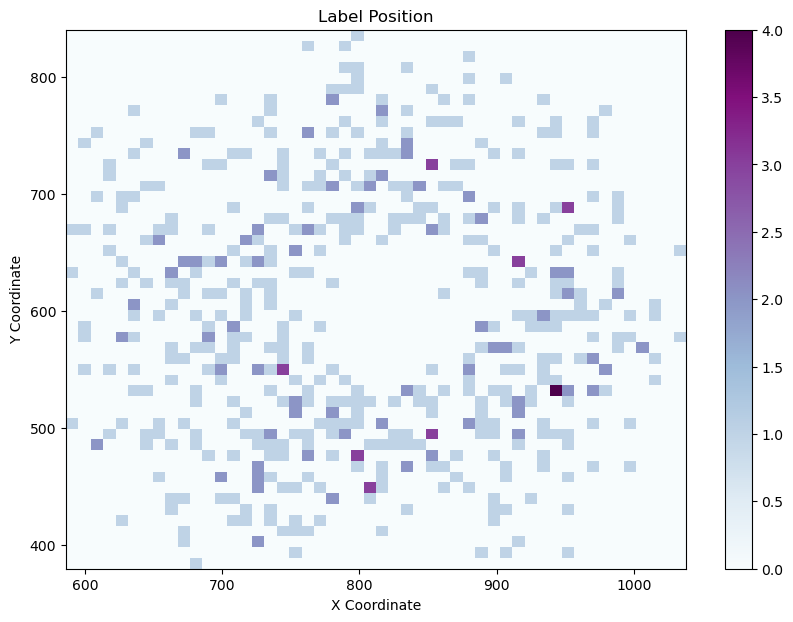

In [11]:
plt.figure(figsize=(10, 7))
plt.hist2d(df['Top-Left'].apply(lambda x: x[0]), df['Top-Left'].apply(lambda x: x[1]), bins=[50, 50], cmap="BuPu")
plt.title('Label Position')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.colorbar()
plt.show()

## Character probability

By looking at the images, we noticed that some characters seem to always be at the same position. For example, the first and second character seem to always be a '5'. Let's confirm that by checking the probability of occurence of each character. 

In [12]:
# Create a contingency table
contingency_table = pd.crosstab(df['Label'], df['Position'])
contingency_table

Position,1,2,3,4,5,6,7,8,9,10,11
Label,,,,,,,,,,,
0,0,0,0,1,0,6,0,45,2,6,3
1,0,0,0,0,29,4,8,2,4,3,1
2,0,0,0,0,21,6,7,0,4,3,3
3,0,0,0,0,0,5,9,0,6,3,4
4,0,0,0,0,0,5,8,0,7,3,6
5,50,49,0,0,0,5,10,0,4,5,2
6,0,1,0,49,0,5,6,1,7,3,5
7,0,0,0,0,0,5,0,0,6,5,3
8,0,0,50,0,0,4,0,0,4,7,7


In [13]:
# Create a probability table 
probability_table = contingency_table.div(contingency_table.sum(axis=0), axis=1)
probability_table

Position,1,2,3,4,5,6,7,8,9,10,11
Label,,,,,,,,,,,
0,0.0,0.00,0.0,0.02,0.00,0.12,0.00,0.90,0.04,0.12,0.06
1,0.0,0.00,0.0,0.00,0.58,0.08,0.16,0.04,0.08,0.06,0.02
2,0.0,0.00,0.0,0.00,0.42,0.12,0.14,0.00,0.08,0.06,0.06
3,0.0,0.00,0.0,0.00,0.00,0.10,0.18,0.00,0.12,0.06,0.08
4,0.0,0.00,0.0,0.00,0.00,0.10,0.16,0.00,0.14,0.06,0.12
5,1.0,0.98,0.0,0.00,0.00,0.10,0.20,0.00,0.08,0.10,0.04
6,0.0,0.02,0.0,0.98,0.00,0.10,0.12,0.02,0.14,0.06,0.10
7,0.0,0.00,0.0,0.00,0.00,0.10,0.00,0.00,0.12,0.10,0.06
8,0.0,0.00,1.0,0.00,0.00,0.08,0.00,0.00,0.08,0.14,0.14


Now that we have the probability of occurence of each charcater according to its position, we can now plot it to visualize it. 

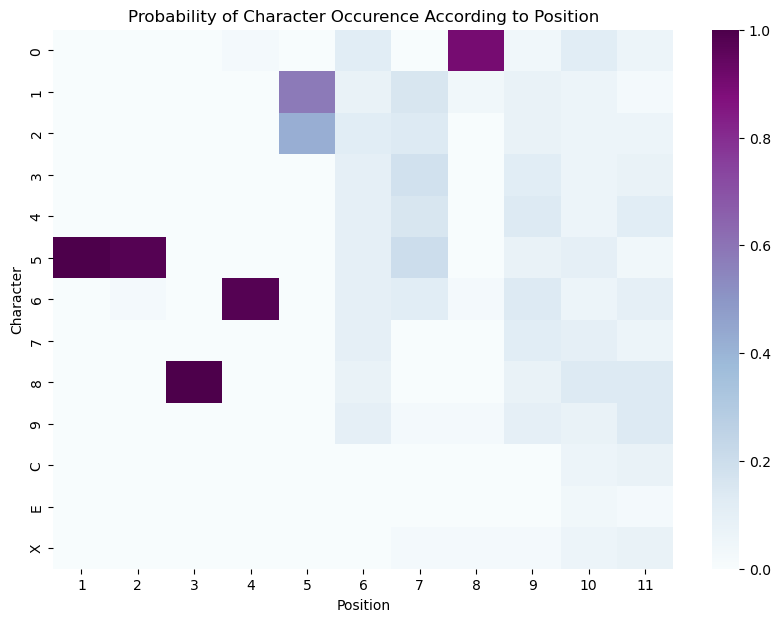

In [15]:
plt.figure(figsize=(10, 7))
#sns.heatmap(probability_table, annot=True)
sns.heatmap(probability_table, cmap="BuPu")
plt.title('Probability of Character Occurence According to Position')
plt.xlabel('Position')
plt.ylabel('Character')
plt.show()

Using the matrix and plot above, we can confirm that the first charcater is always the number '5' and that the third character is always the number '3' (probability of 1). We can also see that the second and fourth charcater are with a probability of 98% the number '5' and '8' respectively. We can also note that the number '0' occures with a high probability in position 8. 

# Conclusion on the analysis :


This analysis provides valuable insights for developping an automatic label reader system for steel billets. Key findings include:

**Strong positional patterns in label numbers:**
- Position 1: Always '5'
- Position 2: 98% probability of '5'
- Position 3: Always '8'
- Position 4: 98% probability of '6'
- Position 8: High probability of '0'

**These patterns can be used to:**

* Optimize the reading zones by focusing on areas with high-confidence digit positions
* Implement a probability-based validation system that flags unusual digit placements
* Add warning alerts when the OCR detects digits in positions where they rarely occur
* Use position-specific character recognition models trained on the most common digits for each position

These improvements could significantly enhance the accuracy and reliability of the automatic label reading system while reducing false positives through probability-based validation.